In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
diabetes=pd.read_csv('/content/drive/MyDrive/Procesamiento y clasificación de datos/Práctica4/Datos/diabetes.csv')

In [4]:
#Visualización de las primeras observaciones del dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[feature_cols] # Features
y = diabetes.Outcome # Target variable

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

Text(0.5, 257.44, 'Predicted label')

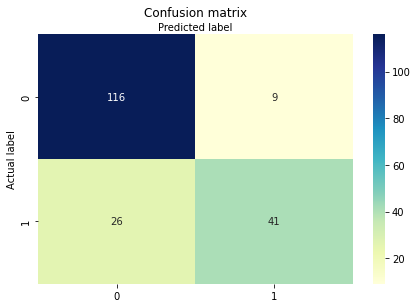

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



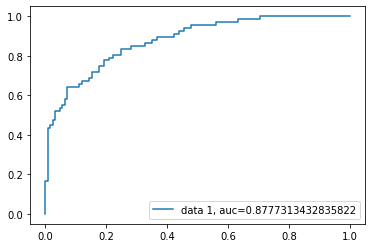

In [12]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [13]:
diabetes['Outcome'].sum()

268

In [14]:
diabetes.shape

(768, 9)

###Práctica 4

In [15]:
#Librerías

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Gaussian
from sklearn.gaussian_process import GaussianProcessClassifier

#Decision tree
from sklearn.tree import DecisionTreeClassifier

#Maquina de soporte vectorial
from sklearn.svm import SVC

#Red neuronal
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
#Randomforest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


#Metricas de evaluacion
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


###K Nearest Neighbors

Encontrar los mejores parámetros para utilizar en el modelo

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [19]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [20]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [21]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.67966507 0.71223513 0.70305878 0.71871155 0.72137731 0.73571429
 0.73962748 0.73831169 0.73834586 0.74347232 0.73694463 0.74736842
 0.74220779 0.75391319 0.74480519 0.75261449 0.75529733 0.75528025
 0.74747095 0.74618934 0.75006835 0.75011962 0.74752221 0.74359193
 0.74620643 0.73316815 0.73708134 0.73053657 0.73185236 0.72535885]


Text(0, 0.5, 'Cross-Validated Accuracy')

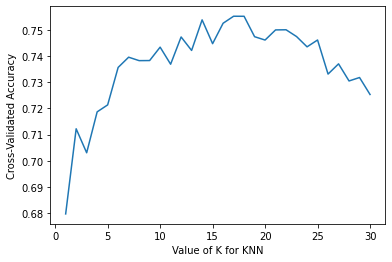

In [22]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [23]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7552973342447027
{'n_neighbors': 17}
KNeighborsClassifier(n_neighbors=17)


In [24]:
# instantiate the model (using the default parameters)
knn_1= KNeighborsClassifier(n_neighbors=17)

# fit the model with data
knn_1.fit(X_train, y_train)

y_pred = knn_1.predict(X_test)

In [25]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[106,  19],
       [ 31,  36]])

Text(0.5, 15.0, 'Predicted label')

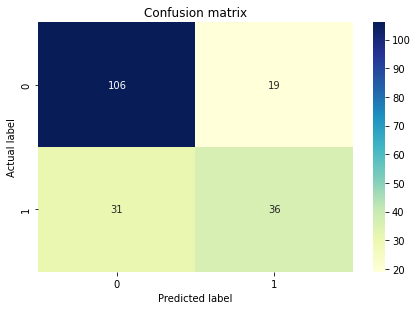

In [26]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.77      0.85      0.81       125
   with diabetes       0.65      0.54      0.59        67

        accuracy                           0.74       192
       macro avg       0.71      0.69      0.70       192
    weighted avg       0.73      0.74      0.73       192



### Naive Bayes

In [29]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [30]:
#Evaluar modelo

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


In [31]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  13],
       [ 22,  45]])

Text(0.5, 15.0, 'Predicted label')

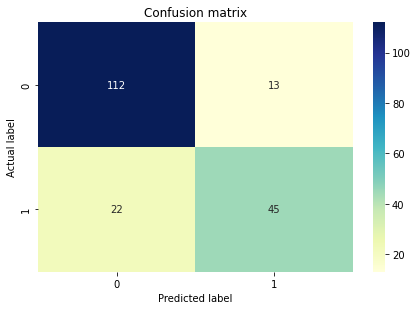

In [32]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.84      0.90      0.86       125
   with diabetes       0.78      0.67      0.72        67

        accuracy                           0.82       192
       macro avg       0.81      0.78      0.79       192
    weighted avg       0.81      0.82      0.81       192



###Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.734375


In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[100,  25],
       [ 26,  41]])

Text(0.5, 15.0, 'Predicted label')

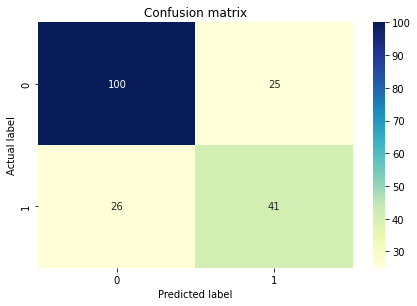

In [38]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.80      0.80       125
   with diabetes       0.62      0.61      0.62        67

        accuracy                           0.73       192
       macro avg       0.71      0.71      0.71       192
    weighted avg       0.73      0.73      0.73       192



###Random Forests

In [40]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7864583333333334


In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[110,  15],
       [ 26,  41]])

Text(0.5, 15.0, 'Predicted label')

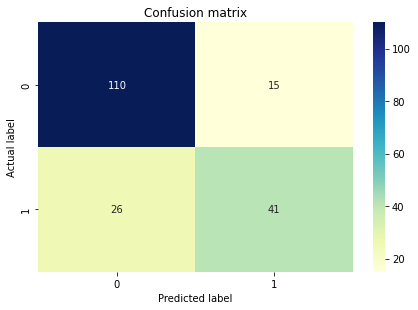

In [43]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.88      0.84       125
   with diabetes       0.73      0.61      0.67        67

        accuracy                           0.79       192
       macro avg       0.77      0.75      0.75       192
    weighted avg       0.78      0.79      0.78       192



###Support Vector Machines

In [45]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
SV = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SV.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SV.predict(X_test)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


In [47]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 15.0, 'Predicted label')

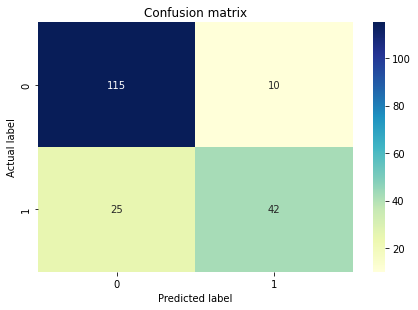

In [48]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



###Neural Network

In [50]:
from sklearn.neural_network import MLPClassifier

NN= MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
NN.predict_proba(X_test[:1])

y_pred= NN.predict(X_test)

In [51]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7291666666666666


In [52]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[99, 26],
       [26, 41]])

Text(0.5, 15.0, 'Predicted label')

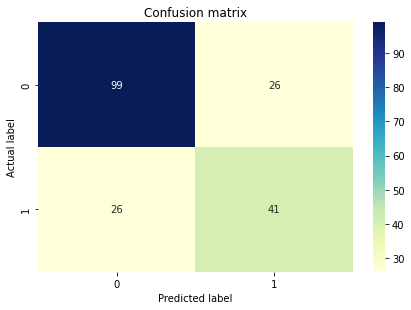

In [53]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.79      0.79       125
   with diabetes       0.61      0.61      0.61        67

        accuracy                           0.73       192
       macro avg       0.70      0.70      0.70       192
    weighted avg       0.73      0.73      0.73       192

